Baseball Case Study
Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

For downloading the dataset, use the link given below. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor,Ridge, Lasso
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the DATASET
df=pd.read_csv("baseball.csv")

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.min()

W        63.00
R       573.00
AB     5385.00
H      1324.00
2B      236.00
3B       13.00
HR      100.00
BB      375.00
SO      973.00
SB       44.00
RA      525.00
ER      478.00
ERA       2.94
CG        0.00
SHO       4.00
SV       28.00
E        75.00
dtype: float64

In [5]:
df.max()

W       100.00
R       891.00
AB     5649.00
H      1515.00
2B      308.00
3B       49.00
HR      232.00
BB      570.00
SO     1518.00
SB      134.00
RA      844.00
ER      799.00
ERA       5.04
CG       11.00
SHO      21.00
SV       62.00
E       126.00
dtype: float64

In [6]:
df.mean()

W        80.966667
R       688.233333
AB     5516.266667
H      1403.533333
2B      274.733333
3B       31.300000
HR      163.633333
BB      469.100000
SO     1248.200000
SB       83.500000
RA      688.233333
ER      635.833333
ERA       3.956333
CG        3.466667
SHO      11.300000
SV       43.066667
E        94.333333
dtype: float64

In [11]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [14]:
#EDA
# Checking Total Numbers of Rows and Column
df.shape

(30, 17)

In [15]:
# Checking All Column Names
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [17]:
# Checking Data Type of All Data
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [18]:
#  Checking for Null Values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

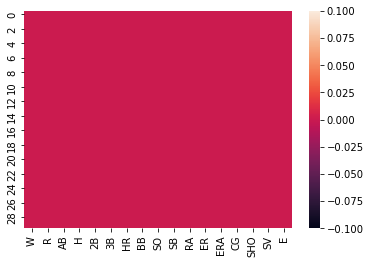

In [19]:
#  There is no null value present in our dataset

#   Checking for Null Values through heatmap also
sns.heatmap(df.isnull())

In [20]:
#   We can check through visualization also that there is no Null Value present in our Dataset.

#   Information about Data (Memory Used and Data Types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [21]:
#   Checking for blank value in our Target Column
df[df['W'] == ''].index

Int64Index([], dtype='int64')

In [22]:
#   So, we can check there are no blank value present in our Target Column

In [23]:
# Checking whether the dataset contains any space
df.loc[df['W']==" "]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


In [24]:
#  So we can see there are no spaces present in the dataset

In [25]:
#  Checking unique values present in the Target Variable.
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [26]:
df['W'].nunique()

24

In [28]:
#  Total Values in the target variable
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

In [29]:
#  Descriptive Statistics
#  Description of Dataset : works only on continuous column 
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [30]:
#  We can check that all the columns contains continuous data.

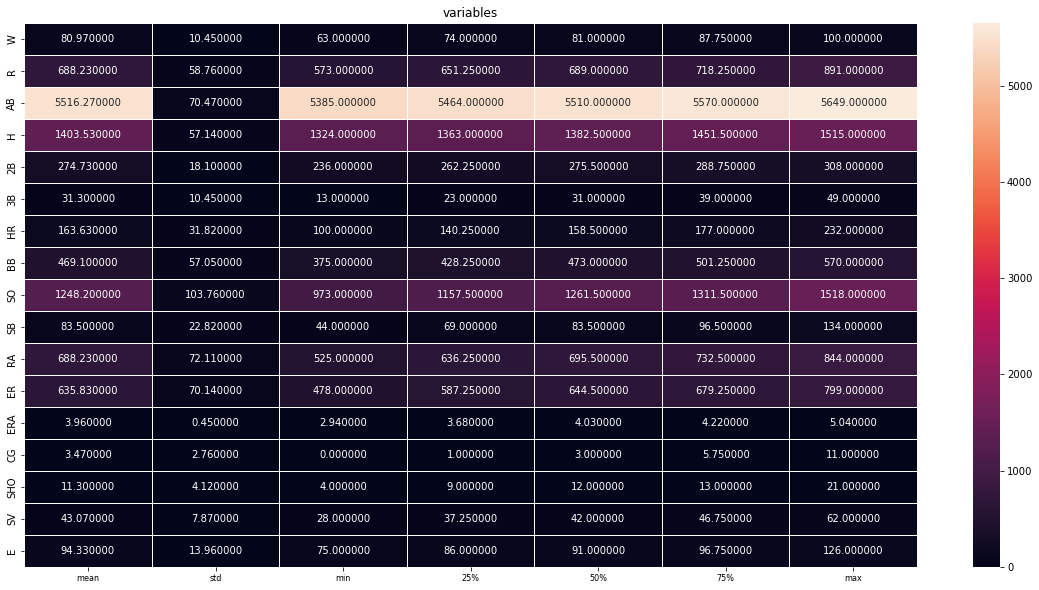

In [33]:
#    Checking Description through heatmap also.
plt.figure(figsize=(20,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=1,annot=True,fmt='f')
plt.xticks(fontsize=14)
plt.xticks(fontsize=8)
plt.title('variables')
plt.show()

Observations 

The summary of this dataset looks good as there are no negative/ invalid value present.
We can see the counts of all the columns are 30 which means no null values are present.
Total No of Rows: 30 and Total No. of Columns: 17
While determining Mean, Standard Deviation, Minimum and Maximum Values of each column.
W:
Mean= 80.966667,
std= 10.453455,
Min= 63.000000,
Max= 100.000000
R:
Mean= 688.233333,
std= 58.761754,
Min= 573.000000,
Max= 891.000000
AB:
Mean= 5516.266667,
std= 70.467372,
Min= 5385.000000,
Max= 5649.000000
H:
Mean= 1403.533333,
std= 57.140923,
Min= 1324.000000,
Max= 1515.000000
2B:
Mean= 274.733333,
std= 18.095405,
Min= 236.000000,
Max= 308.000000
3B:
Mean= 31.300000,
std= 10.452355,
Min= 13.000000,
Max= 49.000000
HR:
Mean= 163.633333,
std= 31.823309,
Min= 100.000000,
Max= 232.000000
BB:
Mean= 469.100000,
std= 57.053725,
Min= 375.000000,
Max= 570.000000
SO:
Mean= 1248.20000,
std= 103.75947,
Min= 973.00000,
Max= 1518.00000
SB:
Mean= 83.500000,
std= 22.815225,
Min= 44.000000,
Max= 134.000000
RA:
Mean= 688.233333,
std= 72.108005,
Min= 525.000000,
Max= 844.000000
ER:
Mean= 635.833333,
std= 70.140786,
Min= 478.000000,
Max= 799.000000
ERA:
Mean= 3.956333,
std= 0.454089,
Min= 2.940000,
Max= 5.040000
CG:
Mean= 3.466667,
std= 2.763473,
Min= 0.000000,
Max= 11.000000
SHO:
Mean= 11.300000,
std= 4.120177,
Min= 4.000000,
Max= 21.000000
SV:
Mean= 43.066667,
std= 7.869335,
Min= 28.000000,
Max= 62.000000
E:
Mean= 94.333333,
std= 13.958889,
Min= 75.000000,
Max= 126.000000
the dataset seems to be having more outliers as well as skewness in the data on the basis of Quantile median result.

In [34]:
#Data Visualization
#Univariate Analysis
#Using Histplot

<AxesSubplot:xlabel='W', ylabel='Count'>

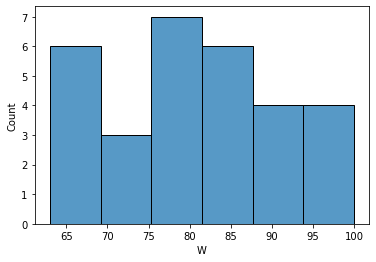

In [35]:
sns.histplot(df['W'])

Observation
The target column 'W' (Win) is normally distributed and no skewness present in it but we will check for skewness later.
Highest Win (W) is in between 76-82 and Lowest Win (W) is in between 69-76.
Overall Win (W) rate is between 63-100.

<AxesSubplot:xlabel='R', ylabel='Count'>

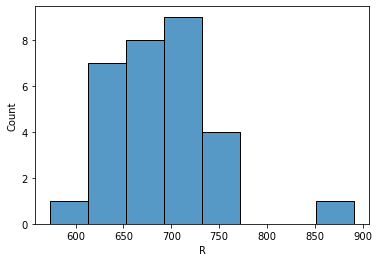

In [36]:
sns.histplot(df['R'])

Observation:
The column 'R' (Runs) is not normally distributed and skewness is also present in it but we will check for skewness later.
Highest Runs (R) is in between 680-730 and No Runs (Runs) is in between 771-855.
Overall Runs (R) rate is between 550-620.

<AxesSubplot:xlabel='AB', ylabel='Count'>

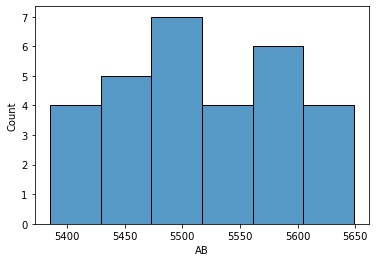

In [37]:
sns.histplot(df['AB'])

Observation
The column 'AB' (At Bats) is normally distributed and no skewness is present in it, will check for skewness later.
Highest At Bats Rate (AB) is in between 5480-5520 and Lowest At Bats Rate (AB) is in between 5380-5430, 5530-5570 and 5610-5645.
Overall At Bats Rate (AB) rate is between 5380-5645.

<AxesSubplot:xlabel='H', ylabel='Count'>

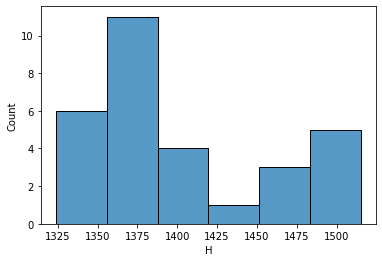

In [38]:
sns.histplot(df['H'])

In [39]:
#Observation:
#The column 'H' (Hits) is not normally distributed and skewness is also present in it but we will check for skewness later.
#Highest Hits (H) is in between 1355-1385 and Lowest Hits (H) is in between 1420-1455.
#Overall Hits (H) rate is between 1322-1525.

<AxesSubplot:xlabel='2B', ylabel='Count'>

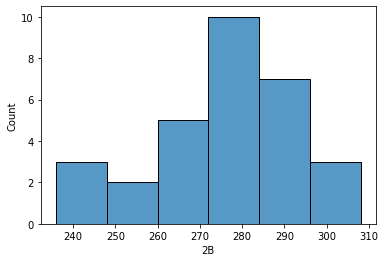

In [40]:
sns.histplot(df['2B'])

In [41]:
#  Observation:
#  The column '2B' (Doubles) is normally distributed but skewness is present in it, we will check for skewness later.
#  Highest Doubles (2B) is in between 272-284 and Lowest Doubles (2B) is in between 248-260.
#   Overall Doubles (2B) rate is between 238-308.

<AxesSubplot:xlabel='3B', ylabel='Count'>

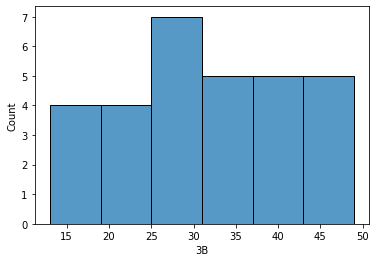

In [42]:
sns.histplot(df['3B'])

In [43]:
# Observation
# The target column '3B' (Triples) is normally distributed and no skewness is present in it but we will check for skewness later.
# Highest Triples (3B) is in between 25-32 and Lowest Triples (3B) is in between 13-25.
# Overall Triples (3B) rate is between 13-48.

<AxesSubplot:xlabel='HR', ylabel='Count'>

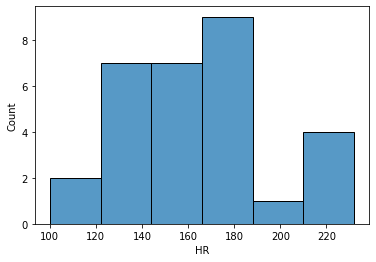

In [44]:
sns.histplot(df['HR'])

In [45]:
#  Observation:
#  The column 'HR' (Homeruns) is not normally distributed and skewness is also present in it but we will check for skewness later.
#  Highest Homeruns (HR) is in between 168-184 and Lowest Homeruns (HR) is in between 188-210.
#  Overall Homeruns (HR) rate is between 100-122.

<AxesSubplot:xlabel='BB', ylabel='Count'>

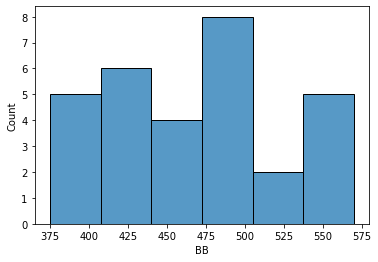

In [46]:
sns.histplot(df['BB'])

In [47]:
#Observation:
#The column 'BB' (Walks) is normally distributed but skewness is present in it, we will check for skewness later.
#Highest Walks (BB) is in between 470-505 and Lowest Walks (BB) is in between 505-540.
#Overall Walks (BB) rate is between 375-570.

<AxesSubplot:xlabel='SO', ylabel='Count'>

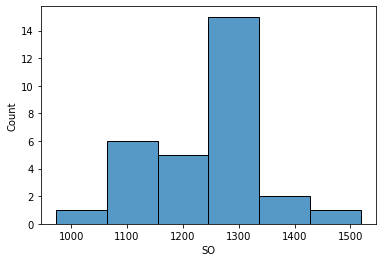

In [48]:
sns.histplot(df['SO'])

In [49]:
#Observation:
#The column 'SO' (Strikeouts) is normally distributed but skewness is present in it, we will check for skewness later.
#Highest Strikeouts (SO) is in between 1250-1350 and Lowest Strikeouts (SO) is in between 500-1150 and 1440-1540.
# Overall Strikeouts (SO) rate is between 500-1540.

<AxesSubplot:xlabel='SB', ylabel='Count'>

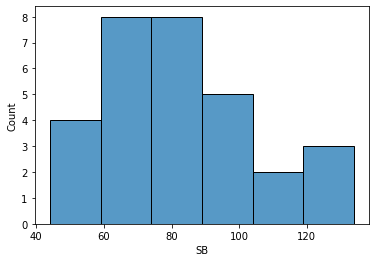

In [50]:
sns.histplot(df['SB'])

In [51]:
#Observation
#The column 'SB' (Stolen Bases) is normally distributed and no skewness is present in it but we will check for skewness later.
#Highest Stolen Bases (SB) is in between 58-90 and Lowest Stolen Bases (SB) is in between 105-118.
#Overall Stolen Bases (SB) rate is between 63-100.

<AxesSubplot:xlabel='RA', ylabel='Count'>

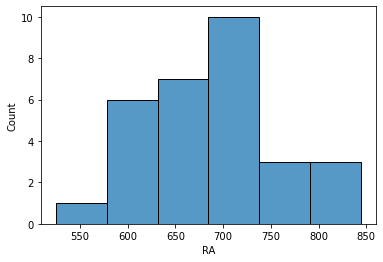

In [52]:
sns.histplot(df['RA'])

In [53]:
#Observation:
#The column 'RA' (Runs Allowed) is normally distributed but skewness is present in it, we will check for skewness later.
#Highest Runs Allowed (RA) is in between 680-730 and Lowest Runs Allowed (RA) is in between 525-575.
#Overall Runs Allowed (RA) rate is between 525-840.

<AxesSubplot:xlabel='ER', ylabel='Count'>

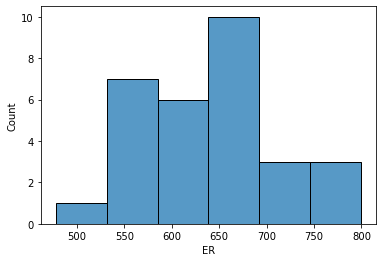

In [54]:
sns.histplot(df['ER'])

In [55]:
#Observation
# The column 'ER' (Earned Runs) is normally distributed and no skewness is present in it but we will check for skewness later.
#Highest Earned Runs (ER) is in between 640-680 and Lowest Earned Runs (ER) is in between 425-525.
#Overall Earned Runs (ER) rate is between 525-800.

<AxesSubplot:xlabel='ERA', ylabel='Count'>

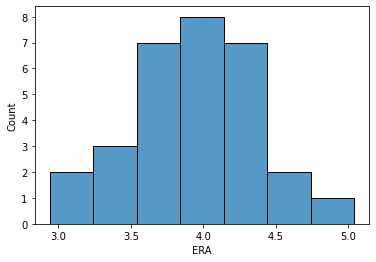

In [56]:
sns.histplot(df['ERA'])

In [57]:
'''Observation:
The column 'ERA' (Earned Run Average ) is normally distributed but skewness is present in it, we will check for skewness later.
Highest Earned Run Average (ERA) is in between 3.8-4.2 and Lowest Earned Run Average (ERA) is in between 4.7-5.1
Overall Earned Run Average (ERA) rate is between 2.9-3.3'''

"Observation:\nThe column 'ERA' (Earned Run Average ) is normally distributed but skewness is present in it, we will check for skewness later.\nHighest Earned Run Average (ERA) is in between 3.8-4.2 and Lowest Earned Run Average (ERA) is in between 4.7-5.1\nOverall Earned Run Average (ERA) rate is between 2.9-3.3"

<AxesSubplot:xlabel='CG', ylabel='Count'>

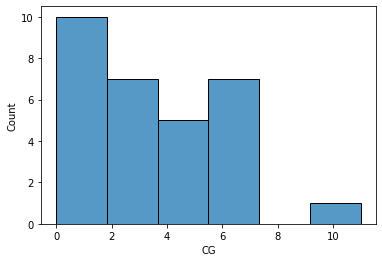

In [58]:
sns.histplot(df['CG'])

In [60]:
#Observation
#The column 'CG' (Complete Games) is normally distributed and there is no skewness present in it but we will check for skewness later.
#Highest Complete Games (CG) is in between 0-1.8 and No Complete Games (CGW) is in between 7.5-9.
#Overall Complete Games (CG) rate is between 0-11.

<AxesSubplot:xlabel='SHO', ylabel='Count'>

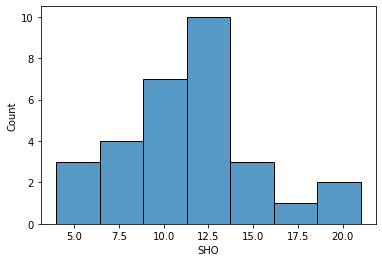

In [61]:
sns.histplot(df['SHO'])

In [62]:
#Observation:
#The column 'SHO' (Shutouts) is normally distributed but skewness is present in it, we will check for skewness later.
#Highest Shutouts (SHO) is in between 11.5-14.5 and Lowest Shutouts (SHO) is in between 16.5-18.5
#Overall Shutouts (SHO) rate is between 4-21.

<AxesSubplot:xlabel='SV', ylabel='Count'>

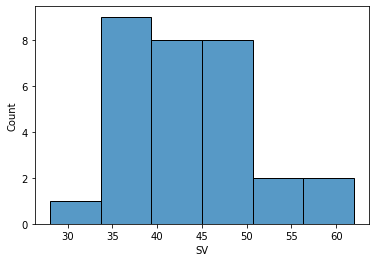

In [63]:
sns.histplot(df['SV'])

In [64]:
#Observation:
#The column 'SV' (Saves) is not normally distributed and skewness is also present in it but we will check for skewness later.
#Highest Saves (SV) is in between 33-39 and Lowest Saves (SV) is in between 28-34.
#Overall Saves (SV) rate is between 28-62.

<AxesSubplot:xlabel='E', ylabel='Count'>

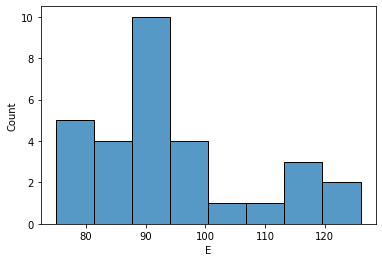

In [65]:
sns.histplot(df['E'])

In [66]:
#Observation:
#The column 'E' (Errors) is not normally distributed and skewness is also present in it but we will check for skewness later.
#Highest Errors (E) is in between 88-94 and Lowest Errors (E) is in between 101-114.
#Overall Errors (E) rate is between 75-82.

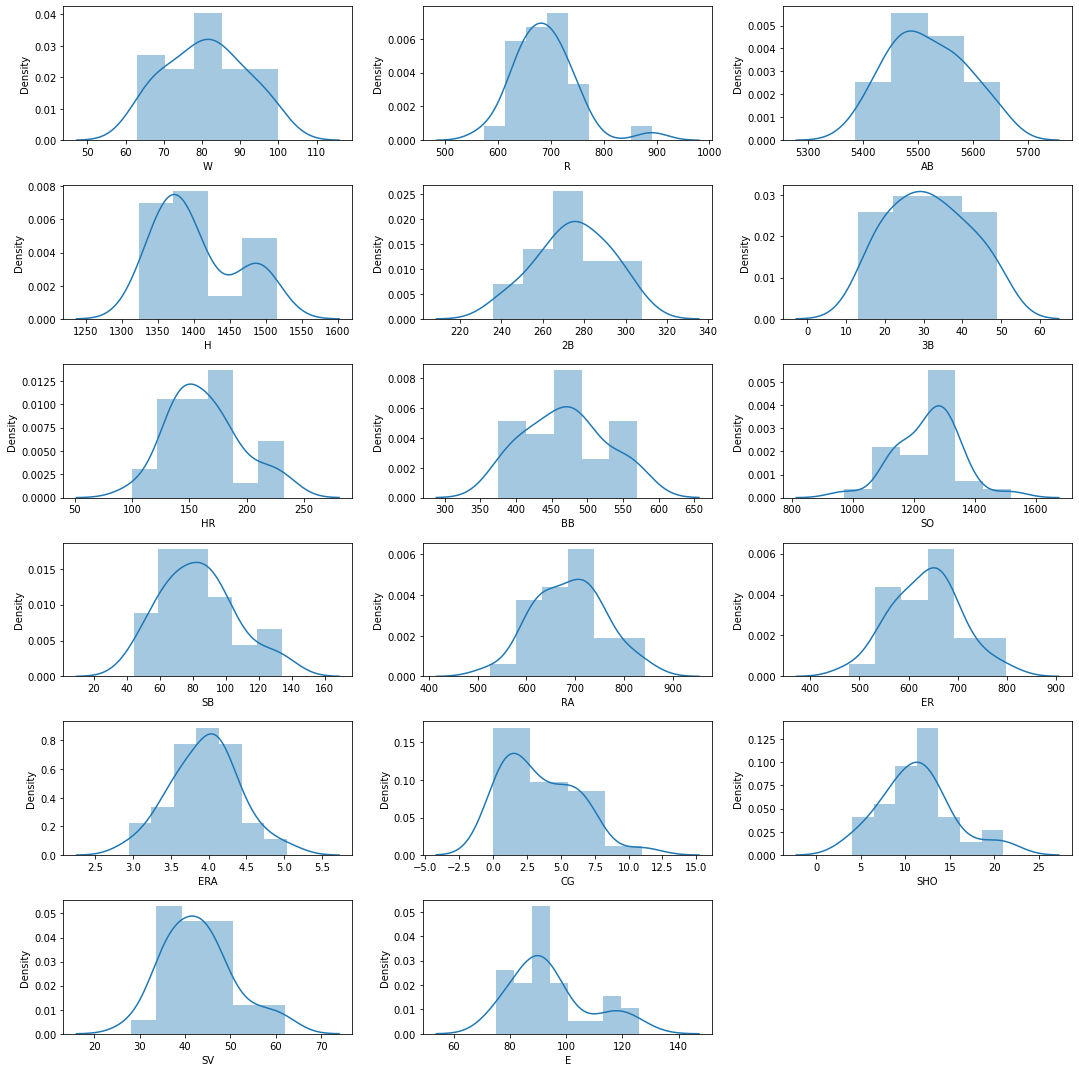

In [70]:
# Normal Distribution Curve:
plt.figure(figsize=(15,15))
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Observation:
The target column 'W' and columns 'AB','3B','SB','CG', & 'ER' is normally distributed and having no skewness.
Column 'R' is not normally distributed and it is skewed to the left and also Column 'H','HR','SV','E' are also not normally distributed but they are skewed to the right.
Columns '2B','BB','SO','RA','ERA'and'SHO' looks normal but skewness is present.

<AxesSubplot:xlabel='R', ylabel='W'>

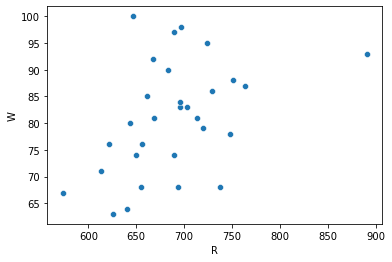

In [71]:
#Bivariate analysis
#Using Scatterplot
#Comparing Features column "Runs (R)" with Target Column "Number of predicted wins (W)"
sns.scatterplot(x="R",y="W",data=df)

We can see as Column Runs (R) is increasing Column Number of predicted wins (W) is also increasing, so Column 'R' is having positive correlation with Column 'W'. Data is not normally distributed , we can see in between 750-890 data is not linear.

<AxesSubplot:xlabel='AB', ylabel='W'>

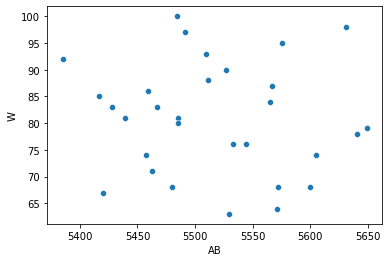

In [72]:
#Comparing Features column "At Bats (AB)" with Target Column "Number of predicted wins (W)"
sns.scatterplot(x="AB",y="W",data=df)

In [73]:
#  We can see the data is normally distributed and Column 'AB' is negatively correlated with Column 'W'.

<AxesSubplot:xlabel='H', ylabel='W'>

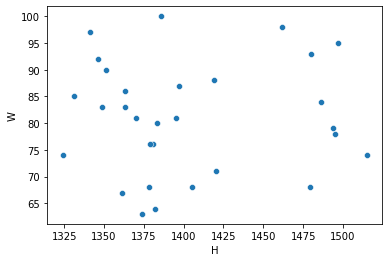

In [74]:
#Comparing Features column "Hits (H)" with Target Column "Number of predicted wins (W)"
sns.scatterplot(x="H",y="W",data=df)

In [75]:
#  Column 'H' is not normally distributed as we can see data is not linear. Column 'H' is positively correlated with Column 'W'.

<AxesSubplot:xlabel='2B', ylabel='W'>

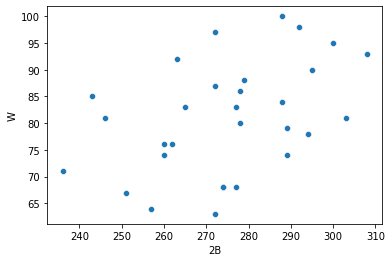

In [76]:
#Comparing Features column "Doubles (2B)" with Target Column "Number of predicted wins (W)"
sns.scatterplot(x="2B",y="W",data=df)

Column '2B' is normally distributed but Column '2B' is positively correlated with Column 'W' as we can see if Column '2B' is increasing Column 'W' is also increasing.

<AxesSubplot:xlabel='3B', ylabel='W'>

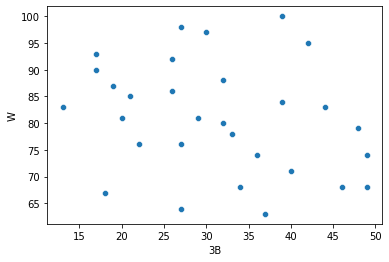

In [77]:
#Comparing Features column "Triples (3B)" with Target Column "Number of predicted wins (W)"
sns.scatterplot(x="3B",y="W",data=df)

Column '3B' is normally distributed but we can see data is not linear and it is negatively correlated as Column '2B' is increasing Column 'W' is also increasing.

<AxesSubplot:xlabel='HR', ylabel='W'>

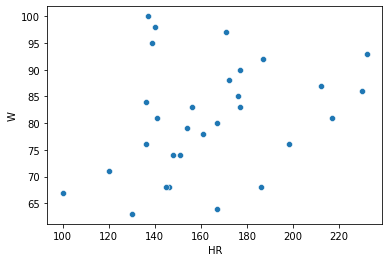

In [78]:
#Comparing Features column "Homeruns (HR)" with Target Column "Number of predicted wins (W)"
sns.scatterplot(x="HR",y="W",data=df)

In [80]:
#  Column 'HR' is normally distributed and we can see as 'HR' is increasing 'W' is also increasing, so it is positively correlated.

<AxesSubplot:xlabel='BB', ylabel='W'>

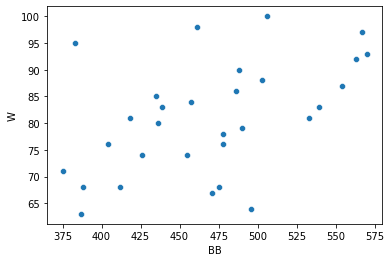

In [81]:
#Comparing Features column "Walks (BB)" with Target Column "Number of predicted wins (W)"
sns.scatterplot(x="BB",y="W",data=df)

In [82]:
#  Column 'BB' is normally distributed and we can see as 'BB' is increasing 'W' is also increasing, so it is positively correlated.

<AxesSubplot:xlabel='SO', ylabel='W'>

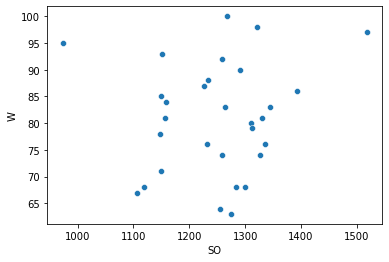

In [83]:
#Comparing Features column "Strikeouts (SO)" with Target Column "Number of predicted wins (W)"
sns.scatterplot(x="SO",y="W",data=df)

In [84]:
#  We can see as 'SO' is increasing 'W' is also increasing, so it is positively correlated and it is normally distributed.

<AxesSubplot:xlabel='SB', ylabel='W'>

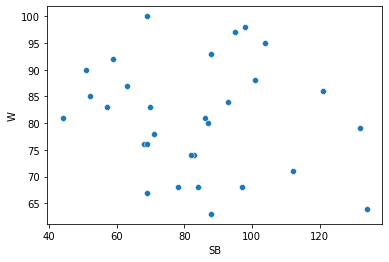

In [85]:
#Comparing Features column " Stolen Bases (SB)" with Target Column "Number of predicted wins (W)"
sns.scatterplot(x="SB",y="W",data=df)

We can see as 'SB' decreases , 'W' is also decreasing. So, it is negatively correlated with each other. Also it is normally distributed.

<AxesSubplot:xlabel='RA', ylabel='W'>

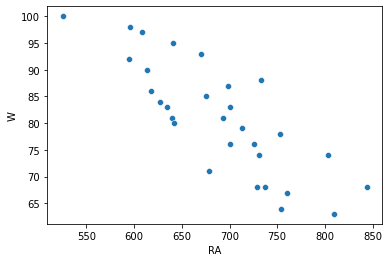

In [87]:
#Comparing Features column "Runs Allowed (RA)" with Target Column "Number of predicted wins (W)"
sns.scatterplot(x="RA",y="W",data=df)

In [88]:
#  'RA' have negative correlation with 'W', We can see as 'RA' is decreasing 'W' is also decreasing.

<AxesSubplot:xlabel='ER', ylabel='W'>

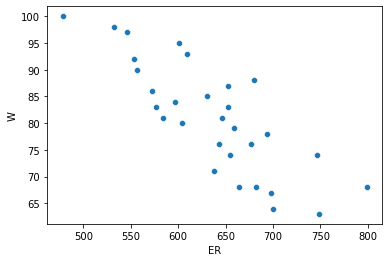

In [89]:
#Comparing Features column "Earned Runs (ER)" with Target Column "Number of predicted wins (W)"
sns.scatterplot(x="ER",y="W",data=df)

In [90]:
#  We can see that as 'ER' decreases, 'W' also decreases. 'ER' is having negative correlation with 'W'. It is normally distributed.

<AxesSubplot:xlabel='ERA', ylabel='W'>

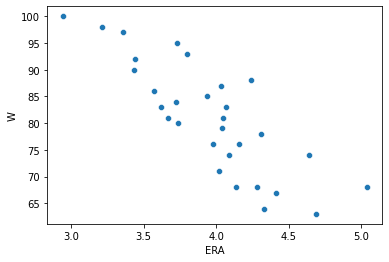

In [91]:
#Comparing Features column "Earned Run Average (ERA)" with Target Column "Number of predicted wins (W)"
sns.scatterplot(x="ERA",y="W",data=df)

In [92]:
#  We can see that as 'ERA' decreases, 'W' also decreases. 'ERA' is having negative correlation with 'W'

<AxesSubplot:xlabel='CG', ylabel='W'>

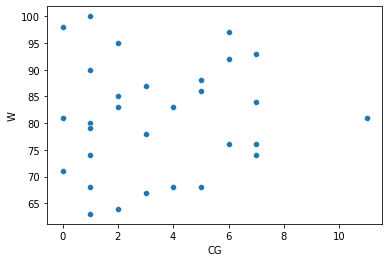

In [93]:
#Comparing Features column "Complete Games (CG)" with Target Column "Number of predicted wins (W)"
sns.scatterplot(x="CG",y="W",data=df)

In [94]:
#  We can see as 'CG' increases 'W' also increases. So, it is positively correlated and normally distributed.

<AxesSubplot:xlabel='SHO', ylabel='W'>

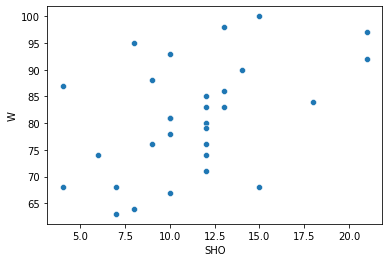

In [95]:
#Comparing Features column "Shutouts (SHO)" with Target Column "Number of predicted wins (W)"
sns.scatterplot(x="SHO",y="W",data=df)

In [96]:
#  It is not linear. We can see as 'SHO' is increasing 'W' is also increasing.

<AxesSubplot:xlabel='SV', ylabel='W'>

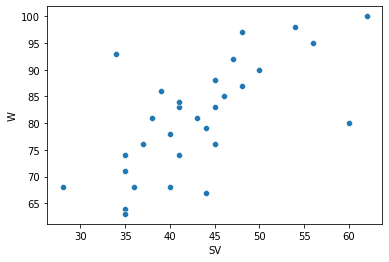

In [97]:
#Comparing Features column "Saves (SV)" with Target Column "Number of predicted wins (W)"
sns.scatterplot(x="SV",y="W",data=df)

In [98]:
#  It is not normally distributed. We can see as 'SV' is increasing 'W' is also increasing.

<AxesSubplot:xlabel='E', ylabel='W'>

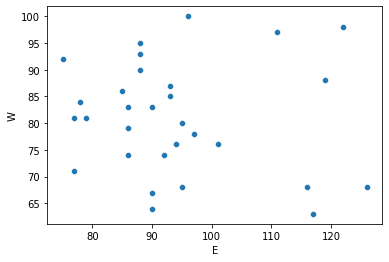

In [99]:
#Comparing Features column "Errors (E)" with Target Column "Number of predicted wins (W)"
sns.scatterplot(x="E",y="W",data=df)

In [100]:
#  It is not normally distributed and negatively correlated as column 'E' is decreasing then column 'W' is also decreasing.

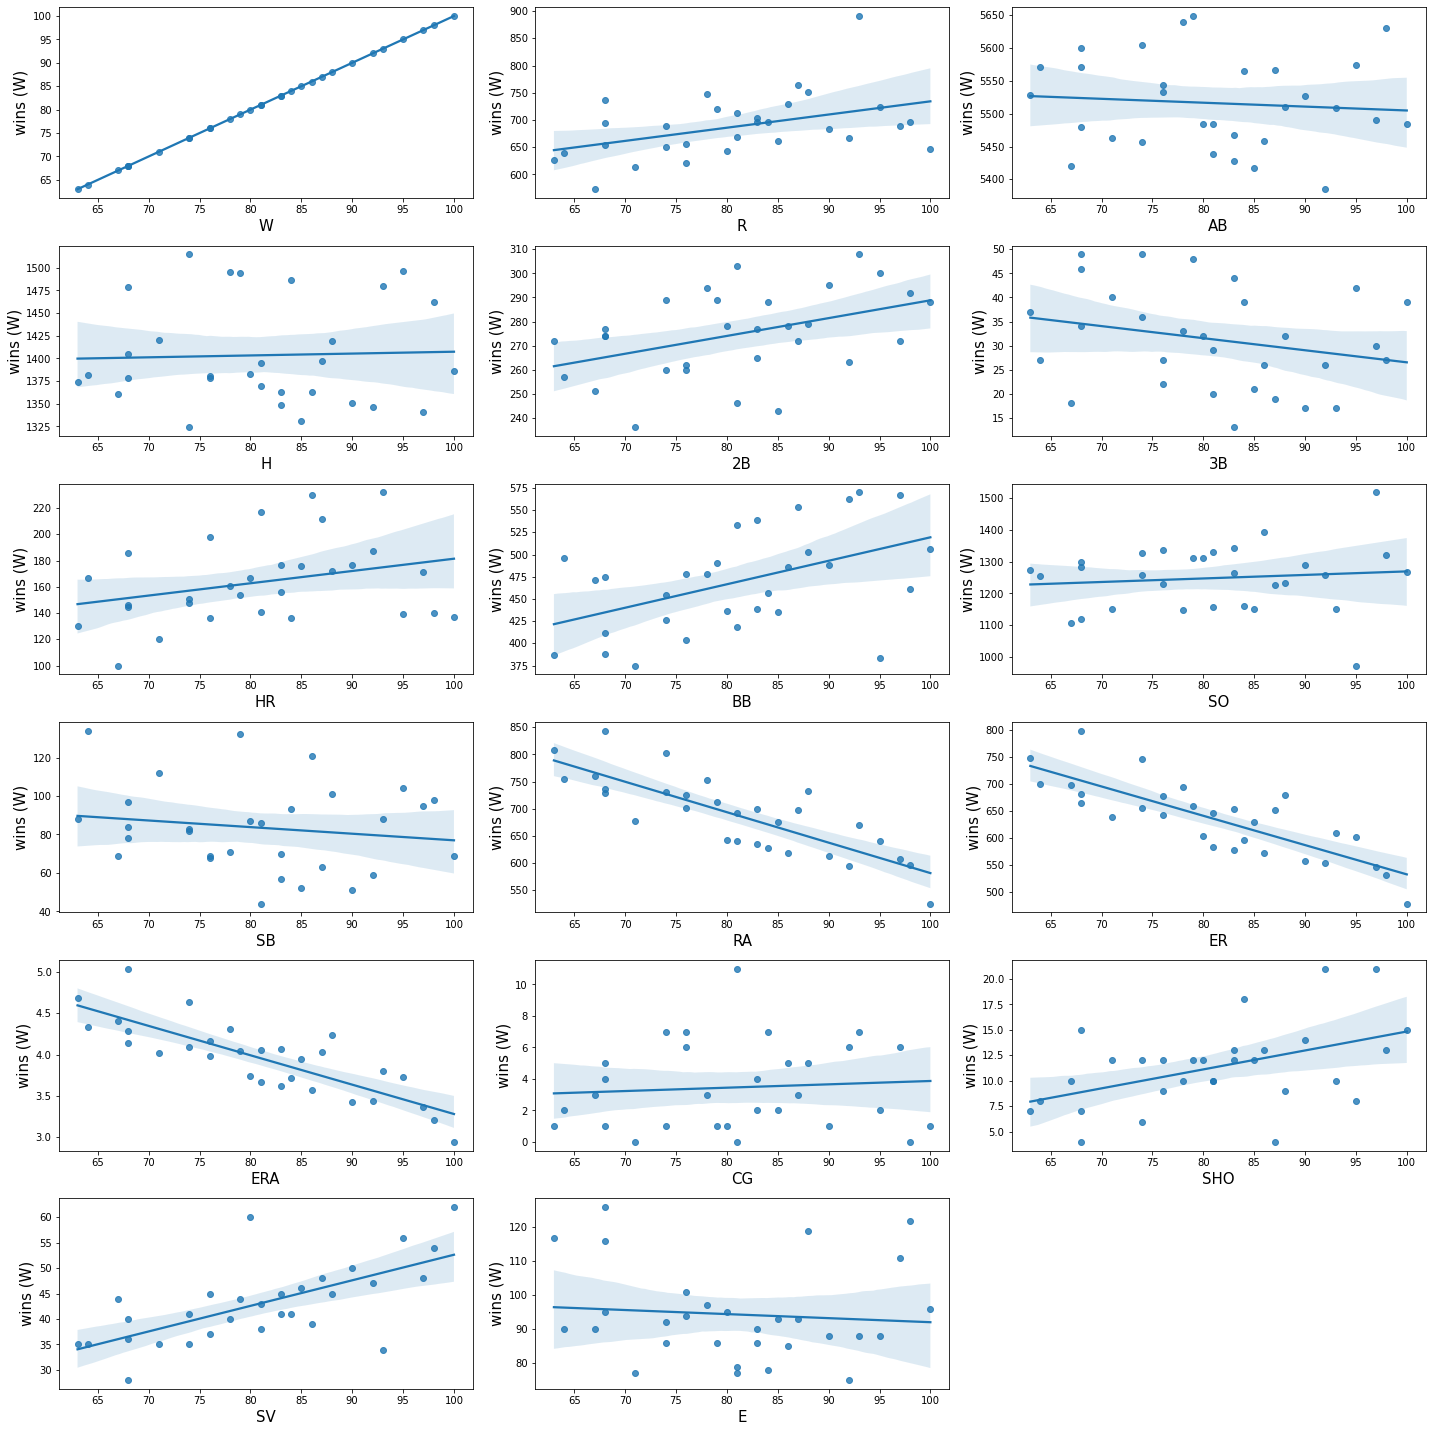

In [101]:
#Using Regplot
#To understand the comparision better, we will use regplot

#Comparing Features columns with Target Column on the basis of "Number of predicted wins (W)" with regplot to understand it better.
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.regplot(y=df[column], x=df["W"])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('wins (W)',fontsize=15)
        
    plotnumber+=1
plt.tight_layout()

In [102]:
#Observations:
#Columns 'AB','3B','SB' & 'ER' are normally distributed and negatively correlated with target column 'W'.
#Columns 'CG' is normally distributed and positively correlated with target column 'W'.
#Column 'R', 'H','HR','SV' are not normally distributed and positively correlated with target column 'W'.
#Column 'E' is not normally distributed and negatively correlated with target column 'W'.

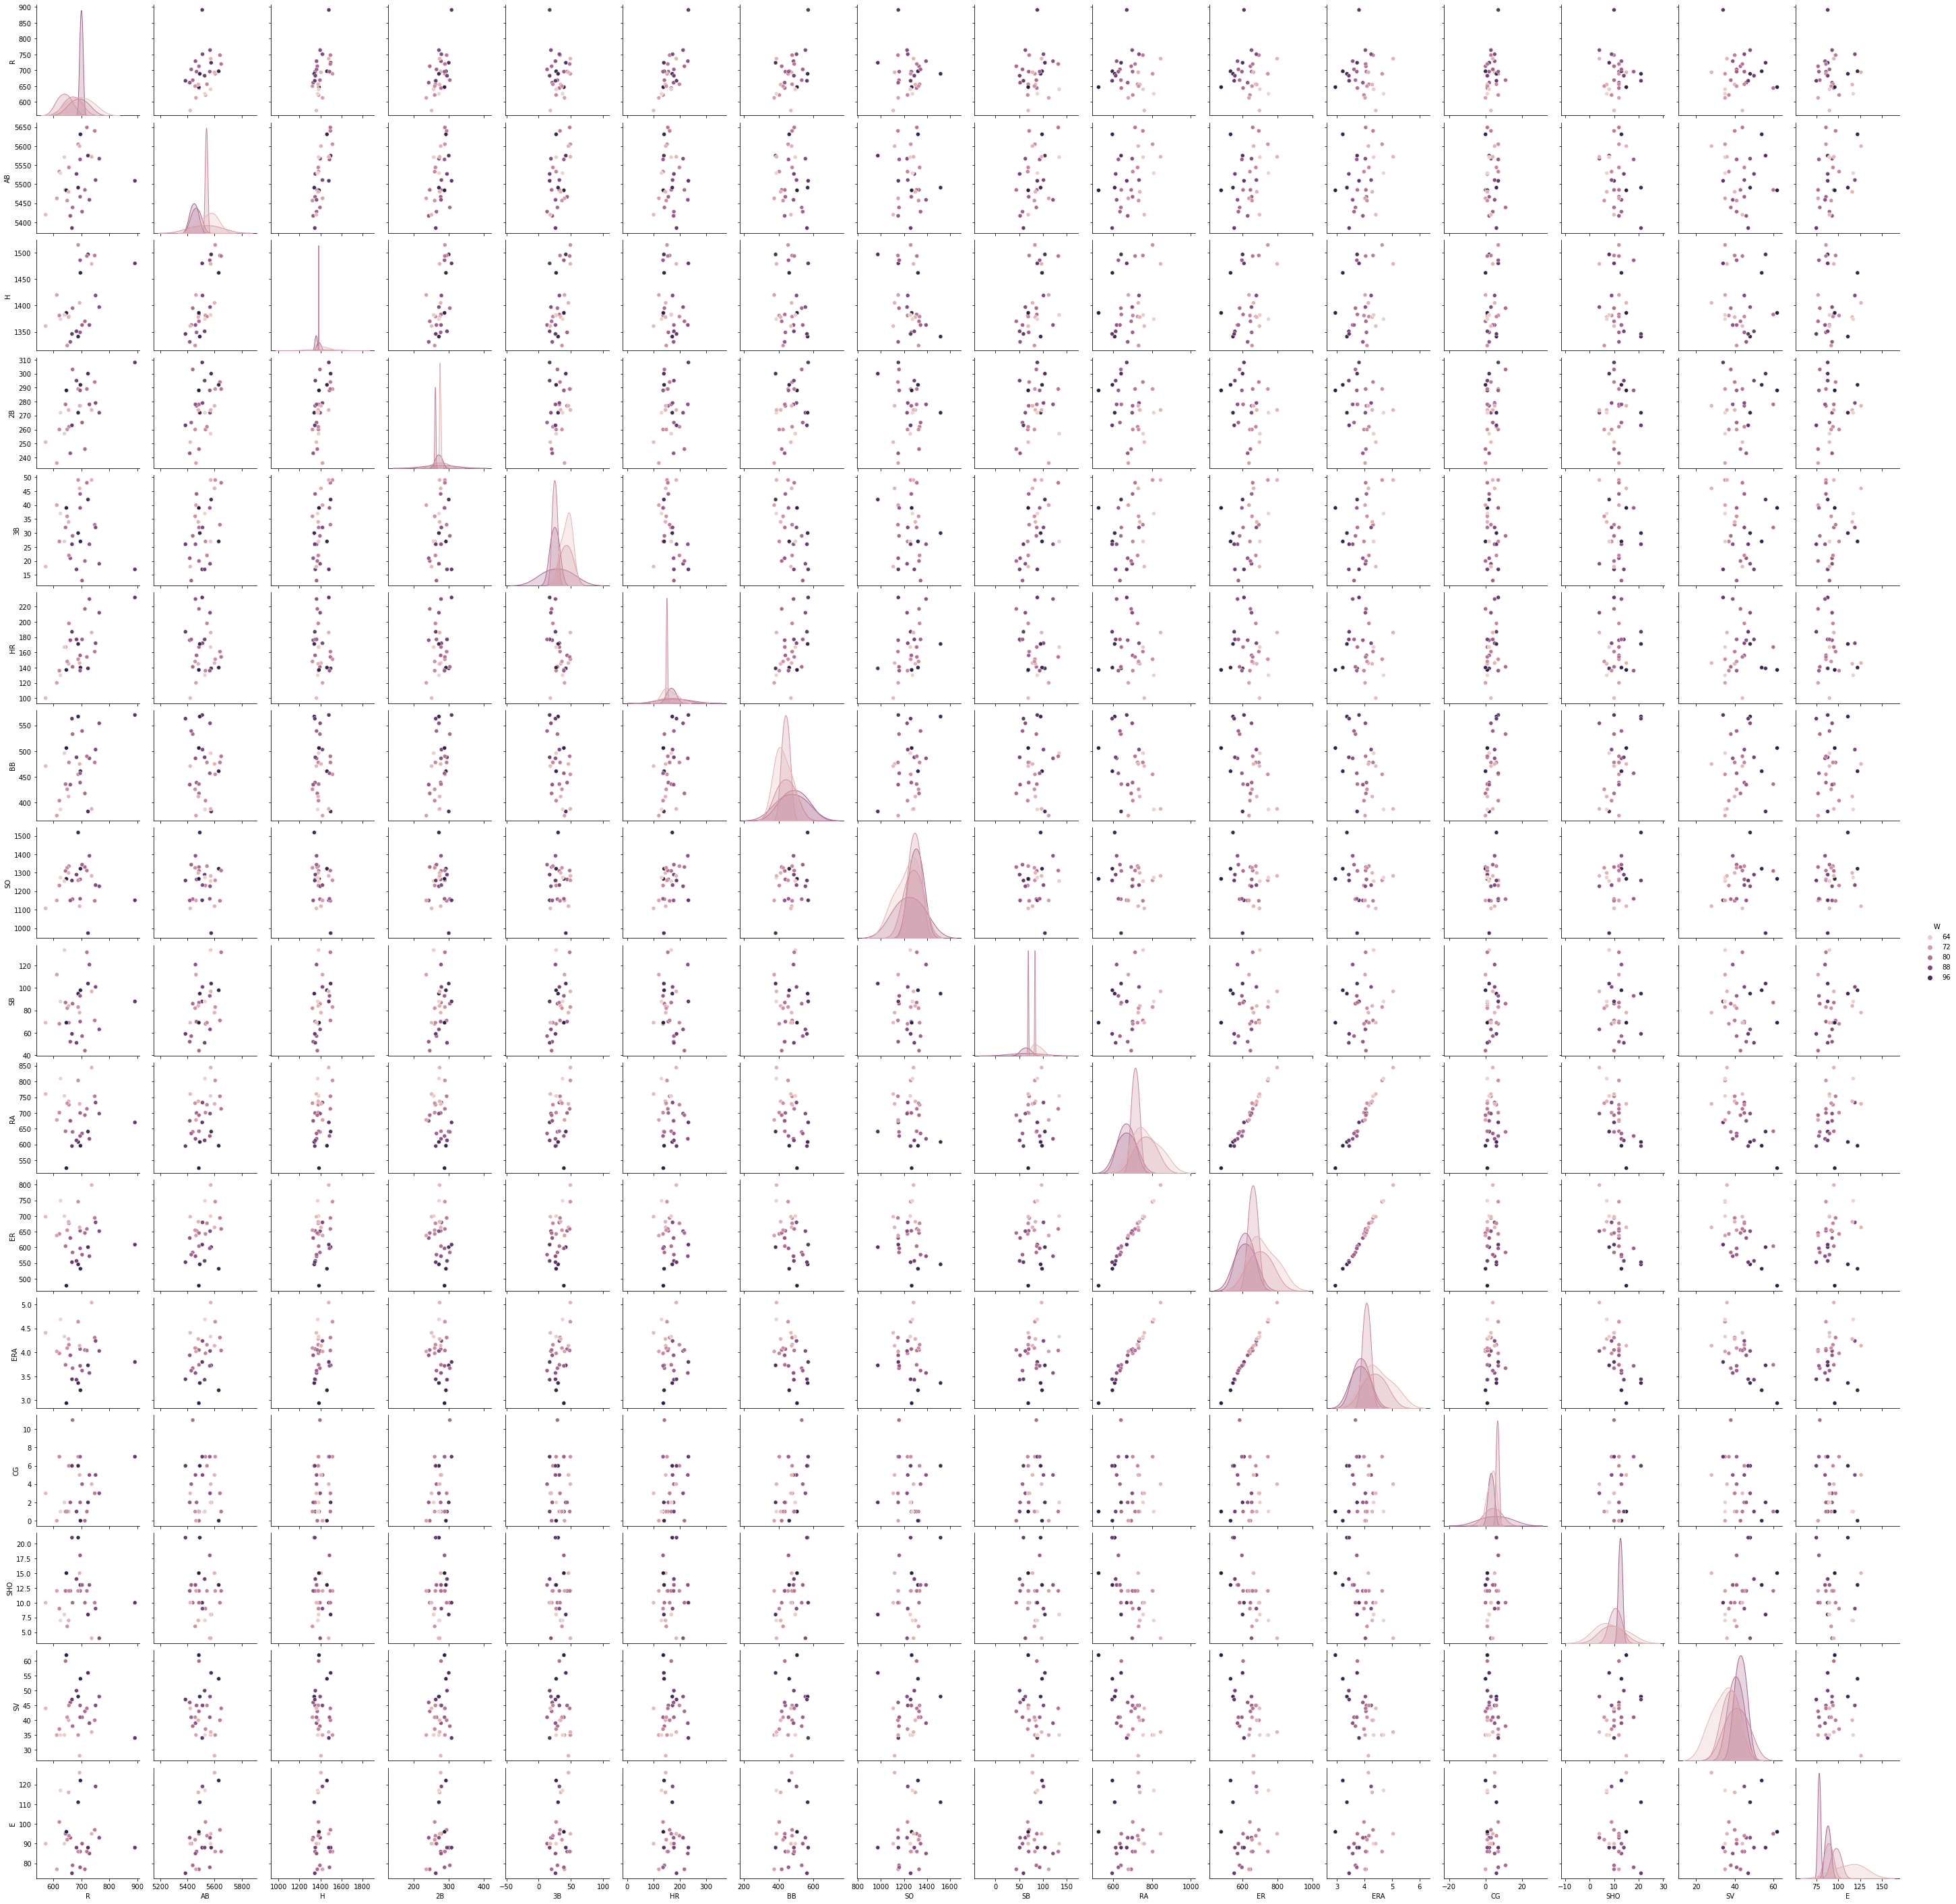

In [103]:
#Multivariate analysis
#Using Pairplot
sns.pairplot(df,hue="W")

We can observe relationship between all the featues column and the target column by this pairplot in pairs which are plotted on basis of target column.

In [105]:
#  Checking Correlation
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [106]:
#  This gives the correlation between the dependent and independent variables.

df.corr()["W"].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

In [107]:
#Here, we can see after sorting the value in decreasing order that column 'SV' is highly positively correlated and column 'ERA' is highly negatively correlated



<AxesSubplot:>

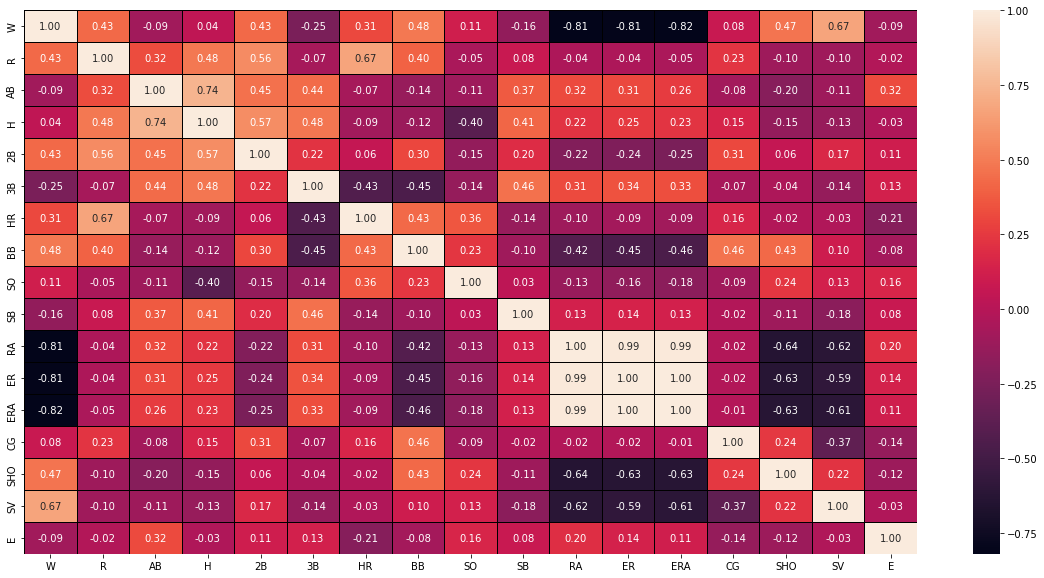

In [108]:
# checking correlation with heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, linewidth=0.5, linecolor='black', fmt='.2f')

Outcome of Correlation
R has 43% correlation with the target column which can be considered as positively correlated
AB has -9% correlation with the target column which can be considered as negatively correlated
H has 4% correlation with the target column which can be considered as positively correlated
2B has 43% correlation with the target column which can be considered as positively correlated
3B has -25% correlation with the target column which can be considered as negatively correlated
HR has 31% correlation with the target column which can be considered as positively correlated
BB has 48% correlation with the target column which can be considered as positively correlated
SO has 11% correlation with the target column which can be considered as positively correlated
SB has -16% correlation with the target column which can be considered as negatively correlated
RA has -81% correlation with the target column which can be considered as negatively correlated
ER has -81% correlation with the target column which can be considered as negatively correlated
ERA has -82% correlation with the target column which can be considered as highly negatively correlated
CG has 8% correlation with the target column which can be considered as positively correlated
SHO has 47% correlation with the target column which can be considered as positively correlated
SV has 67% correlation with the target column which can be considered as highly positively correlated
E has -9% correlation with the target column which can be considered as negatively correlated
Max Correlation: SV

Min Correlation: ERA

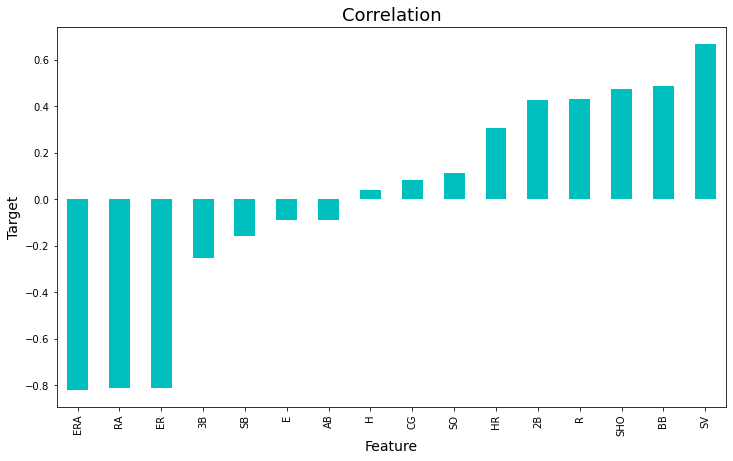

In [109]:
# Checking correlation by plotting barplot.
plt.figure(figsize=(12,7))
df.corr()['W'].sort_values(ascending=True).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Observation of the correlation:
Positively correlated with : 'H', 'CG', 'SO', 'HR', '2B', 'R', 'SHO', 'BB' and 'SV'

Negatively correlated with : 'ERA', 'RA', 'ER', '3B', 'SB', 'E' and 'AB'

In heatmap also we observed that the 'H' column is least correlated with the target variable, so we can drop that column.

In [110]:
#  Dropping column 'H'
df.drop('H',axis=1, inplace=True)

In [111]:
#checking columns again after dropping the column 'H'
df.columns

Index(['W', 'R', 'AB', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [112]:
#checking total rows and columns again after dropping the column 'H'
df.shape

(30, 16)

In [113]:
df.head()

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


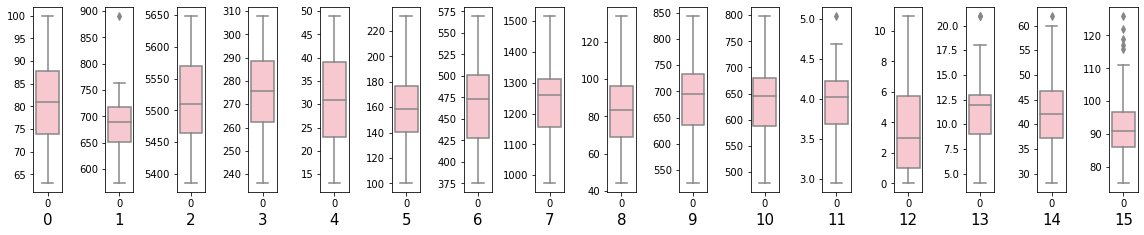

In [115]:
#  Checking Outliers
collist=df.columns.values
ncol=16
nrows=30
plt.figure(figsize=(ncol,6*ncol))
for column in range(0,len(collist)):
    plt.subplot(nrows,ncol,column+1)
    sns.boxplot(data=df[collist[column]],color='pink',orient='v')
    plt.xlabel(column,fontsize = 15)
    plt.tight_layout()

Observation:
Outliers present in columns: 'R', 'ERA', 'SHO', 'SV' and 'E'
Outliers not present in columns: 'W', 'AB', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER' and 'CG'
Column 'W' is target column so we will not remove outliers from it but we will remove from columns: 'R', 'ERA', 'SHO', 'SV' and 'E'

In [116]:
#Removing Outliers
# 1. Zscore method using Scipy
#  Outliers will be removed only from columns: 'R', 'ERA', 'SHO', 'SV' and 'E'
variables = df[['R', 'ERA', 'SHO', 'SV', 'E']]
z=np.abs(zscore(variables))
# Creating new dataframe
df_case = df[(z<3).all(axis=1)]
df_case.head()

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [117]:
z.head()

,R,ERA,SHO,SV,E
0,0.619078,0.506955,0.814629,1.671607,0.461470
1,0.134432,0.254598,0.172800,0.249879,0.607197
2,0.332906,0.641347,0.320914,0.654856,1.117242
3,1.146419,0.053010,0.567771,0.784104,0.485758
4,0.013270,1.531318,0.172800,1.042600,0.607197


In [118]:
len(np.where(z>3)[0])

1

In [119]:
#checking total no of data in old and new dataframe after removing outliers using zscore method
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",df_case.shape)
print("Total Dropped rows:",df.shape[0]-df_case.shape[0])

Old DataFrame data in Rows and Column: (30, 16)
New DataFrame data in Rows and Column: (29, 16)
Total Dropped rows: 1


In [120]:
#  Percentage Data Loss using Zscore
loss_percent=(30-29)/30*100
print(loss_percent,"%")

3.3333333333333335 %


In [121]:
#  2. IQR (Inter Quantile Range) method
#1st quantile
Q1=variables.quantile(0.25)
# 3rd quantile
Q3=variables.quantile(0.75)
#IQR
IQR=Q3 - Q1
df_new=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [122]:
#checking total no of data in old and new dataframe after removing outliers using zscore method
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",df_new.shape)
print("\nTotal Dropped rows:",df.shape[0]-df_new.shape[0])

Old DataFrame data in Rows and Column: (30, 16)

New DataFrame data in Rows and Column: (20, 16)

Total Dropped rows: 10


In [123]:
# Percentage Data Loss using IQR
loss_perc = (30-20)/30*100
loss_perc

33.33333333333333

In [124]:
#  We can check by using IQR method there is large data loss in comparision to Zscore method. So, we will consider Zscore method.
#  Checking for the skewness
df_case.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

Observation:
Skewness threshold taken is +/-0.5. Columns which are having skewness: 'CG', 'SHO', 'SV' and 'E'. So, we will remove skewness from these columns.

The 'CG' column data is highly skewed

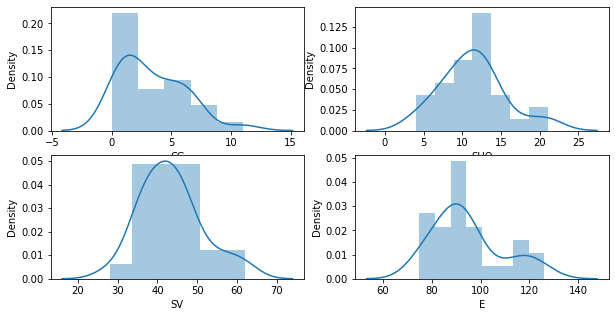

In [126]:
#Checking skewness of columns through Data visualization using distplot
collist=[ 'CG', 'SHO', 'SV', 'E']
plt.figure(figsize=(10,5), facecolor='white')
plotnumber = 1
for column in df_case[collist]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df_case[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [127]:
#  Removing skewness using yeo-johnson method
collist=['CG', 'SHO', 'SV', 'E']
df_case[collist]=power_transform(df_case[collist],method='yeo-johnson')
df_case[collist]

,CG,SHO,SV,E
0,-0.307098,-0.787002,1.532753,-0.348265
1,-0.307098,0.236737,0.312020,-0.540820
2,2.011315,-0.252844,-0.664137,-1.326125
3,1.264463,-0.513555,-0.820689,0.650818
4,1.264463,0.236737,-1.149165,-0.540820
6,0.121871,-2.064039,0.677176,0.082858
7,-1.732896,-0.252844,0.052325,-1.588197
8,-0.870682,0.236737,1.908137,0.237592
9,0.121871,-0.252844,-0.365006,0.383386
10,0.770649,-0.513555,0.312020,1.554265


In [128]:
#  checking skewness after removal
df_case.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

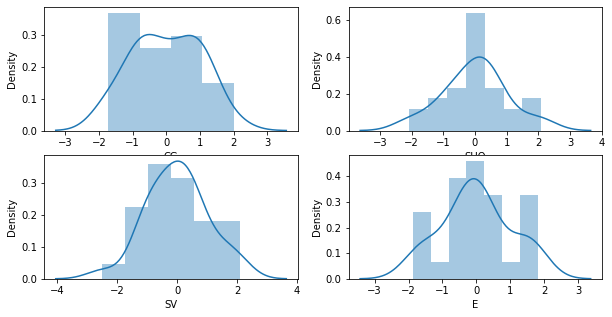

In [130]:
#checking skewness after removal through data visualization using distplot
collist=[ 'CG', 'SHO', 'SV', 'E']
plt.figure(figsize=(10,5), facecolor='white')
plotnumber = 1
for column in df_case[collist]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df_case[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [131]:
#  The data is not normal but the skewness has got removed compared to the old data.

In [132]:
# Data preprocessing
#  Spliting data into Target and Features:
x=df_case.drop("W",axis=1)
y=df_case["W"]

In [133]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [134]:
x.head()

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,300,42,139,383,973,104,641,601,3.73,-0.307098,-0.787002,1.532753,-0.348265
1,696,5467,277,44,156,439,1264,70,700,653,4.07,-0.307098,0.236737,0.312020,-0.540820
2,669,5439,303,29,141,533,1157,86,640,584,3.67,2.011315,-0.252844,-0.664137,-1.326125
3,622,5533,260,27,136,404,1231,68,701,643,3.98,1.264463,-0.513555,-0.820689,0.650818
4,689,5605,289,49,151,455,1259,83,803,746,4.64,1.264463,0.236737,-1.149165,-0.540820


In [135]:
y.shape

(29,)

In [136]:
x.shape

(29, 15)

In [137]:
# The data is balanced.

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.121871,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.732896,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.870682,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.121871,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.770649,-0.513555,0.312020,1.554265


Variance Threshold Method
It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

In [138]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [139]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [140]:
#x =pd.DataFrame(x)

In [141]:
x.columns[var_threshold.get_support()]

Index(['R', 'AB', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG',
       'SHO', 'SV', 'E'],
      dtype='object')

In [142]:
x.shape

(29, 15)

In [143]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


In [144]:
#So we can see that, with the help of variance threshold method, we got to know all the features here are important. So now we will use the SelectKBest method.

#SelectKBest method
best_fit = SelectKBest(score_func = f_classif, k =13)
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [145]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(13,'Score'))

   Feature     Score
14       E  4.329879
7       SB  3.283197
8       RA  2.524616
0        R  2.485509
13      SV  1.764635
10     ERA  1.732208
9       ER  1.636442
1       AB  1.622586
6       SO  1.519889
12     SHO  1.003077
5       BB  0.943327
4       HR  0.818974
3       3B  0.811129


In [146]:
x = x.drop([ "CG"],axis=1)

In [147]:
x

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,-0.513555,0.312020,1.554265


Text(0.5, 1.0, 'The curve after Feature  selection with 12 features')

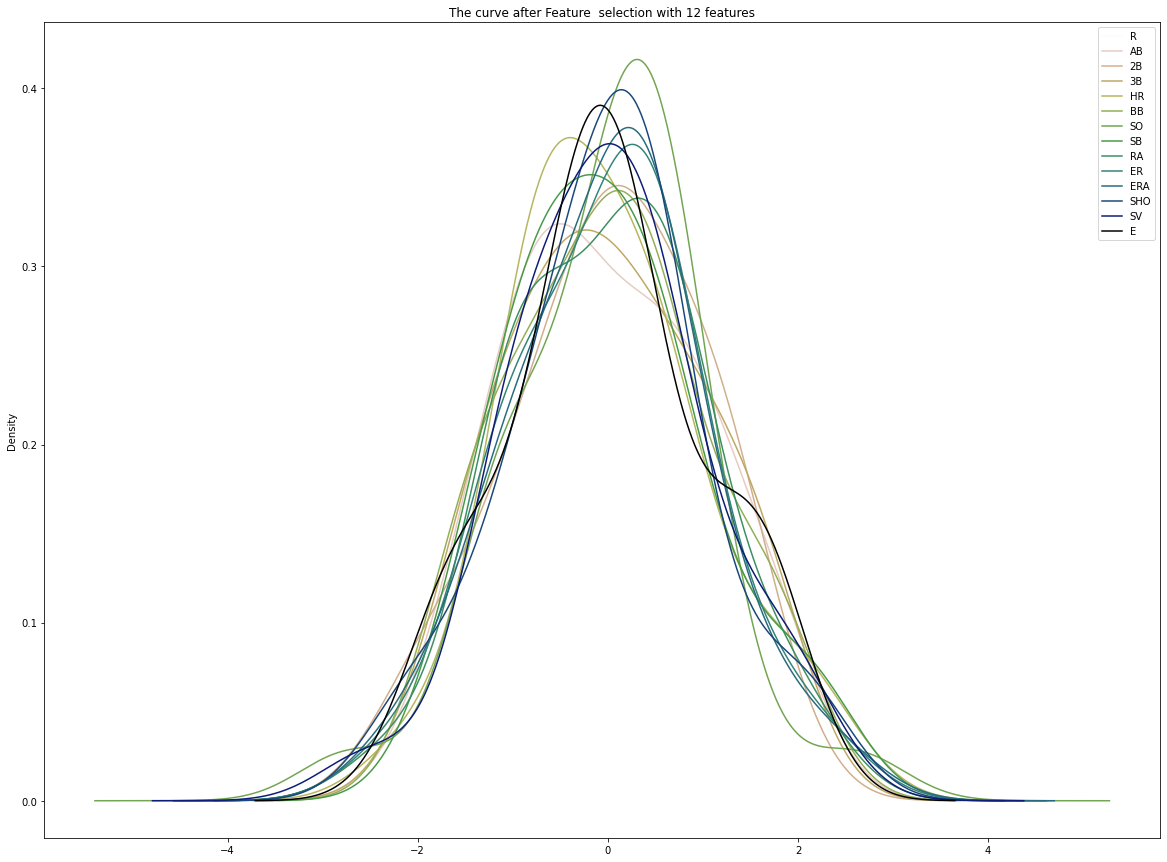

In [149]:
x.plot( kind='kde', figsize=(20,15), cmap='gist_earth_r')
plt.title('The curve after Feature  selection with 12 features')

Now, we have completed features selection process through using 2 techniques.

Checking for Multicolinearity
VIF (Variance Inflation factor)

In [150]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,6.219825,R
1,9.828077,AB
2,2.683572,2B
3,3.196853,3B
4,7.369072,HR
5,2.686472,BB
6,2.741072,SO
7,1.757901,SB
8,179.096825,RA
9,1754.643859,ER


In [151]:
#  The VIF value is more than 10 in the columns 'AB', 'RA', 'ER' and 'ERA'. But column 'ER' is having highest VIF value. So, we will drop column 'ER'.

In [152]:
x.drop('ER', axis =1, inplace=True)

In [153]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,4.352902,R
1,3.177214,AB
2,2.597985,2B
3,3.072775,3B
4,4.949255,HR
5,2.561982,BB
6,2.661842,SO
7,1.680467,SB
8,119.939744,RA
9,111.859162,ERA


Here we can see that Multicolinearity is still present in the columns. So, we will again drop highest VIF value column which is 'RA'to remove Multicolinearity.

In [154]:
x.drop('RA', axis =1, inplace=True)

In [155]:
#Checking again Multicolinearity using VIF
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,4.250076,R
1,2.238746,AB
2,2.597917,2B
3,3.030073,3B
4,4.562014,HR
5,2.222720,BB
6,2.042786,SO
7,1.568151,SB
8,3.878177,ERA
9,2.651314,SHO


Now, we can check Multicolinearity is removed from the columns as VIF value of all columns are less than 10. So, we will create model now.

Creating Model
Finding the best random state among all the models

In [156]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9291790579976077  on Random_state  50


In [157]:
#   At random state 168, we are getting best accuracy score i.e., 92%

In [158]:
# Creating train-test-split
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [159]:
x.shape, y.shape

((29, 12), (29,))

In [160]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((20, 12), (20,), (9, 12), (9,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. As it is a continuous data , so we have to understand this by Classification problem

As it is a continuous data , so we will understand this by Regression Algorithms

In [161]:
#  Regression Algorithms
#  Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
#prediction
pred_lr=lr.predict(x_test)
#checking R2 Score
print("R2 score: ", r2_score(y_test, pred_lr))
#checking Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_lr))
#checking Mean squared error
print("Mean squared error: ",mean_squared_error(y_test,pred_lr))
#checking Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score:  0.9291790579976077
Mean abs error:  2.4627865987898443
Mean squared error:  10.163242343651952
Root Mean Squared Error:  3.187984056367276


In [162]:
#  R2 score for Linear Regression is 92%

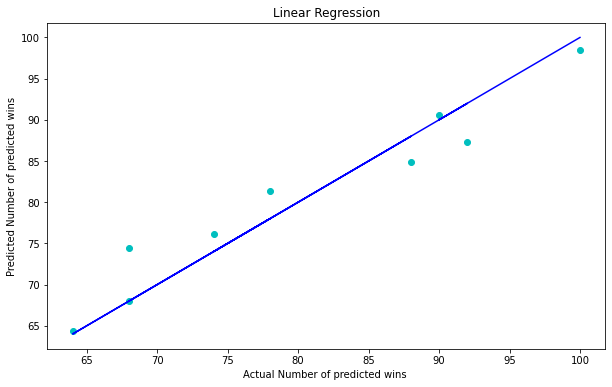

In [163]:
#Checking the performance of the model by graph
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_lr,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Number of predicted wins ")
plt.ylabel("Predicted Number of predicted wins")
plt.title("Linear Regression")
plt.show()

In [164]:
#Random forest Regression Model
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=28)
RFR.fit(x_train,y_train)
# prediction
pred_RFR=RFR.predict(x_test)
#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_RFR))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_RFR))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_RFR))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score:  0.6481079232622158
Mean abs error:  6.0607407407407425
Mean squared error:  50.498685185185224
Root Mean Squared Error:  7.106242691126249


In [165]:
#  R2 score for Random forest Regression is 64%

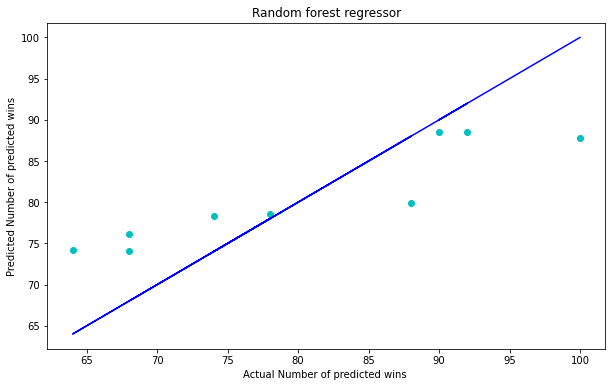

In [166]:
# Checking the performance of the model by graph
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_RFR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Number of predicted wins ")
plt.ylabel("Predicted Number of predicted wins")
plt.title("Random forest regressor")
plt.show()

In [167]:
#KNN regressor
# Checking R2 score for KNN Regressor
knn=KNN(n_neighbors=9 )
knn.fit(x_train,y_train)
# prediction
pred_knn=knn.predict(x_test)
#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_knn))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_knn))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_knn))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score:  0.4031888047717366
Mean abs error:  8.246913580246915
Mean squared error:  85.64609053497942
Root Mean Squared Error:  9.254517304267113


In [168]:
#  R2 score for KNN regressor is 40%

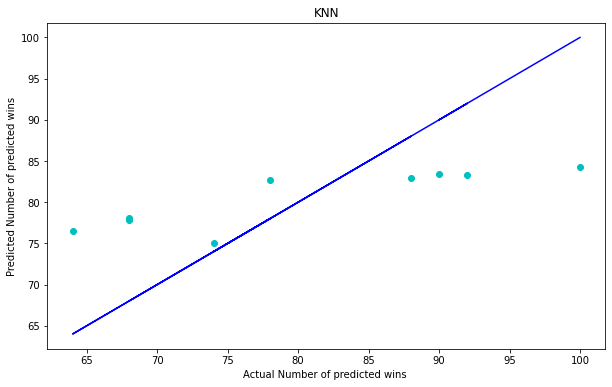

In [169]:
# Checking the performance of the model by graph
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_knn,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Number of predicted wins ")
plt.ylabel("Predicted Number of predicted wins")
plt.title("KNN")
plt.show()

In [170]:
#Support Vector Regression Model
# Checking R2 score for Support Vector Regression Model
sv= SVR(kernel='linear')
sv.fit(x_train,y_train)
# prediction
pred_sv=sv.predict(x_test)
#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_sv))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_sv))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_sv))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_sv)))

R2 score:  0.815404321731428
Mean abs error:  4.617107691219603
Mean squared error:  26.49061931103556
Root Mean Squared Error:  5.14690385678959


In [171]:
#R2 score for SVR is 81%


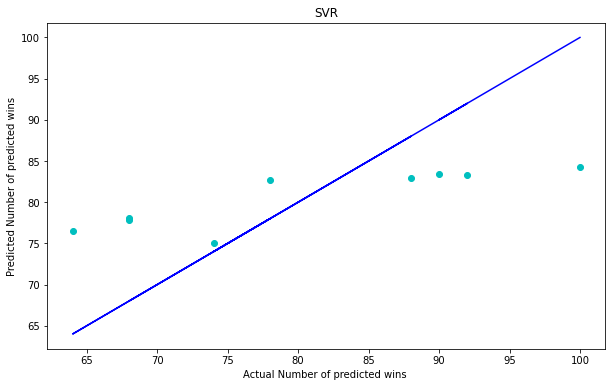

In [172]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_knn,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Number of predicted wins ")
plt.ylabel("Predicted Number of predicted wins")
plt.title("SVR")
plt.show()

In [173]:
#Gradient Boosting Regressor
# Checking R2 score for Gradient Boosting Regressor 
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=29, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)
# prediction
pred_Gb=Gb.predict(x_test)
#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_Gb))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_Gb))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_Gb))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_Gb)))

R2 score:  0.4728184135092932
Mean abs error:  6.719380870979736
Mean squared error:  75.65381186874043
Root Mean Squared Error:  8.697919973691436


In [174]:
#  R2 score for Gradient Boosting Regressor is 47%

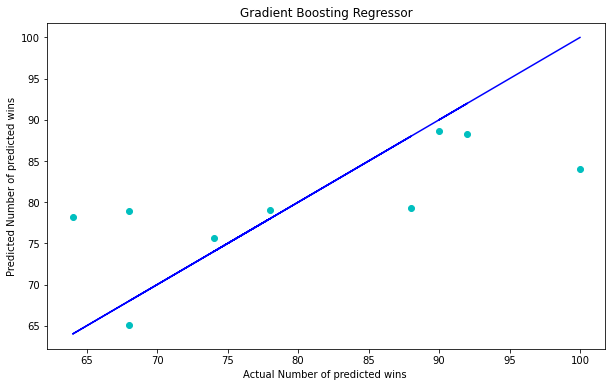

In [175]:
# Checking the performance of the model by graph
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_Gb,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Number of predicted wins ")
plt.ylabel("Predicted Number of predicted wins")
plt.title("Gradient Boosting Regressor")
plt.show()

In [176]:
#Ridge Regressor
paramRidge = {'alpha':[0.01,0.1,1.0,10.26],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
ridge = Ridge()
clf = GridSearchCV(ridge,paramRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10.26, 'solver': 'svd'}


In [177]:
# Checking R2 score for Ridge Regressor
ridge=Ridge(alpha=10.26,solver='sag')
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
# prediction
pred_ridge=ridge.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_ridge))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_ridge))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_ridge))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2 score:  0.8226404960752568
Mean abs error:  4.389117728832321
Mean squared error:  25.452183624953268
Root Mean Squared Error:  5.045015720981776


In [178]:
#  R2 score for Ridge Regressor is 82%

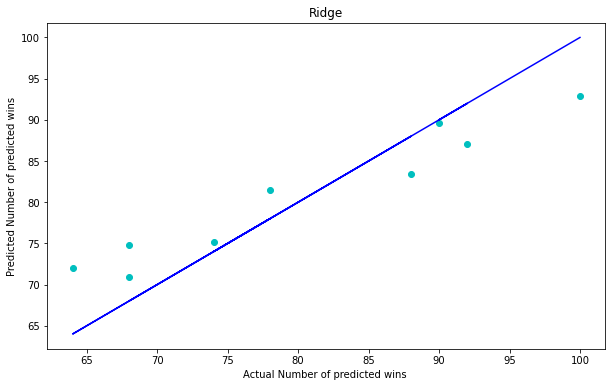

In [179]:
#  Checking the performance of the model by graph
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_ridge,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Number of predicted wins ")
plt.ylabel("Predicted Number of predicted wins")
plt.title("Ridge")
plt.show()

In [180]:
# LASSO Regressor
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso = Lasso()
clf = GridSearchCV(lasso,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [181]:
# Checking R2 score for LASSO Regressor
lasso = Lasso(alpha=1,random_state=0)
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train)
# prediction
pred_lasso = lasso.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_lasso))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_lasso))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_lasso))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 score:  0.8642951302468397
Mean abs error:  3.8253497504300973
Mean squared error:  19.4744864939597
Root Mean Squared Error:  4.41299065192299


In [182]:
#  R2 score for LASSO Regressor is 86%

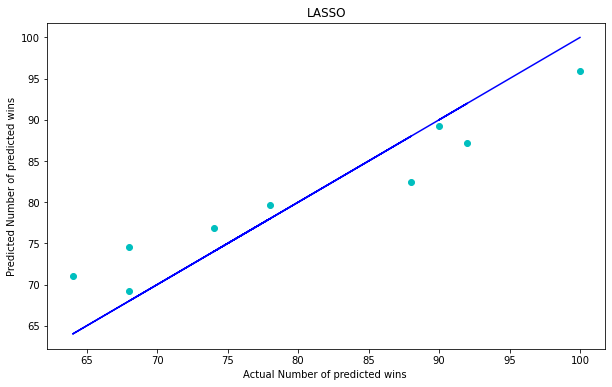

In [183]:
#Checking the performance of the model by graph
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_lasso,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Number of predicted wins ")
plt.ylabel("Predicted Number of predicted wins")
plt.title("LASSO")
plt.show()

In [184]:
#Checking Cross Validation Score of Models
# Checking CV score for Linear Regression
print('The CV score  for Linear_regression is :',cross_val_score(lr,x,y,cv=4).mean())

The CV score  for Linear_regression is : 0.3709653633698605


In [185]:
# Checking CV score for Random Forest Regression
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x,y,cv=4).mean())

The CV  score for  the Random forest regressor is: 0.4923135193808653


In [186]:
# Checking CV score for KNN Regression
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x,y,cv=4).mean())

The CV score  for  the KNN regressor is : 0.38794786073351406


In [187]:
# Checking CV score for SVR Regression
print('The CV score  for  the SVR regressor is :',cross_val_score(sv,x,y,cv=4).mean())

The CV score  for  the SVR regressor is : 0.6229864637005642


In [188]:
# Checking CV score for GBR Regression
print('The CV score  for  the GBR regressor is :',cross_val_score(Gb,x,y,cv=4).mean())

The CV score  for  the GBR regressor is : 0.10794093828012735


In [189]:
#  Checking CV score for Ridge Regression
print('The CV score  for  the Ridge regressor is :',cross_val_score(ridge,x,y,cv=4).mean())

The CV score  for  the Ridge regressor is : 0.6642206667256161


In [190]:
#  Checking CV score for Lasso Regression
print('The CV score  for  the Lasso regressor is :',cross_val_score(lasso,x,y,cv=4).mean())

The CV score  for  the Lasso regressor is : 0.7704895963548826


In [191]:
#Hyper Parameter Tuning
# The LASSO Regressor with GridsearchCV
parameter = {'n_estimators':[100,200,300,400],
             'learning_rate':[0.1,0.01,0.001,1],
             'subsample': [0.1,0.2,0.3,0.5,1],
             'max_depth':[1,2,3,4],
             'alpha':[0.1,0.01,0.001,1]}

In [192]:
GridCV = GridSearchCV(Lasso(),parameters,cv=4)

In [193]:
GridCV.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]})

In [194]:
GridCV.best_params_

{'alpha': 1, 'random_state': 0}

In [196]:
#Creating Final Model
best_model = Lasso(alpha=0.1,fit_intercept='bool',max_iter=10,selection='random',tol=1000)
best_model.fit(x_train,y_train)

Lasso(alpha=0.1, fit_intercept='bool', max_iter=10, selection='random',
      tol=1000)

In [197]:
#prediction
pred = best_model.predict(x_test)
#Accuracy score
acc = r2_score(y_test,pred_lasso)
print(acc*100)

86.42951302468397


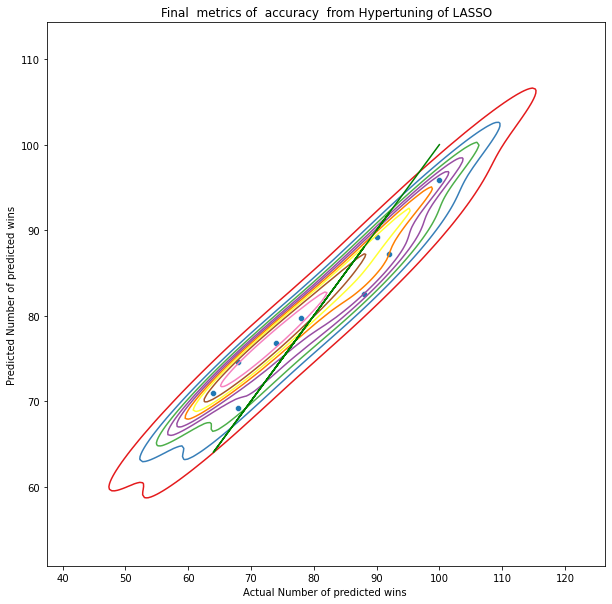

In [198]:
#So, after the Hypertuning now we got a accuracy score of 86% on Lasso Regression

#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=pred_lasso,palette='Set2')
sns.kdeplot(x=y_test,y=pred_lasso, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual Number of predicted wins ")
plt.ylabel("Predicted Number of predicted wins")
plt.title("Final  metrics of  accuracy  from Hypertuning of LASSO")
plt.show()

In [199]:
# Saving The Predictive Model
#saving the model at local file system
filename='Baseball_Case_Study.pickle'
pickle.dump(best_model,open(filename,'wb'))
#prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([59.82680098, 80.41507619, 71.02433647, 79.51644674, 70.72237789,
       72.1201455 , 93.44847926, 97.44312647, 99.40122737])

In [200]:
# Adjusted R2 score
lr.score(x_train,y_train)

0.9048764239232999

In [201]:
# Let's check how well model fits the test data
lr.score(x_test,y_test)

0.9291790579976077

In [202]:
# Prediction
import numpy as np
a = np.array(y_test)
predicted = np.array(best_model.predict(x_test))
Baseball_Case_Stud = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Baseball_Case_Stud

,Original,Predicted
0,68,59.826801
1,78,80.415076
2,74,71.024336
3,88,79.516447
4,68,70.722378
5,64,72.120145
6,92,93.448479
7,90,97.443126
8,100,99.401227


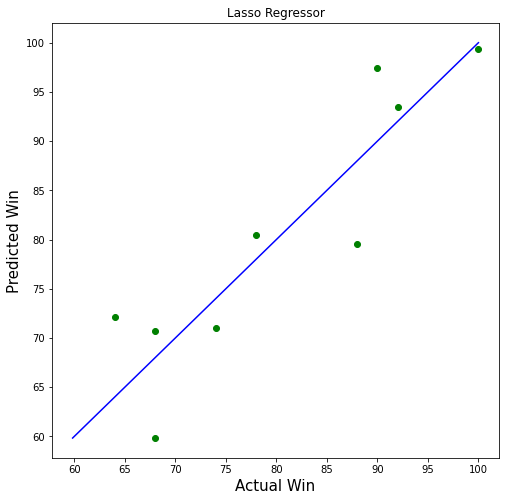

In [204]:
# Let's plot and visualize
plt.figure(figsize=(8,8))
plt.scatter(y_test,predicted,c='g')
plt1 = max(max(predicted),max(y_test))
plt2 = min(min(predicted),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual Win',fontsize=15)
plt.ylabel('Predicted Win',fontsize=15)
plt.title("Lasso Regressor")
plt.show()